# Introduction to Machine Learning /  Introduction au Machine Learning

## Linear regression / Regression linéaire  

### Example 1: / Exemple 1: SURFACE vs APPATEMENT PRICE / vs PRIX APPARTEMENT

* Les données présentés dans cette étude sont fournies par Michel Tenenhaus, professeur à HEC, concernent un échantillon de 24 offres de ventes d\'appartements.

- The data presented in this study are provided by Michel Tenenhaus, professor at HEC, relate to a sample of 24 offers for sale of apartments

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Creation d'un dataframe pandas pour stocker les valeurs de X et de Y
# Create pandas dataframe to store our X and Y values

Y = [130,280,800,268,790,500,320,250,
     378,250,350,300,155,245,200,325,
      85,78,375,200,270,295,85,495]

X = [28,50,196,55,190,110,60,48,
     90,35,86,65,32,52,40,70,
    28,30,105,52,80,60,20,100]

df = pd.DataFrame(
    {'X': X,
     'Y': Y}
)

In [3]:
# Show the first five rows of our dataframe
df.head()

,X,Y
0,28,130
1,50,280
2,196,800
3,55,268
4,190,790


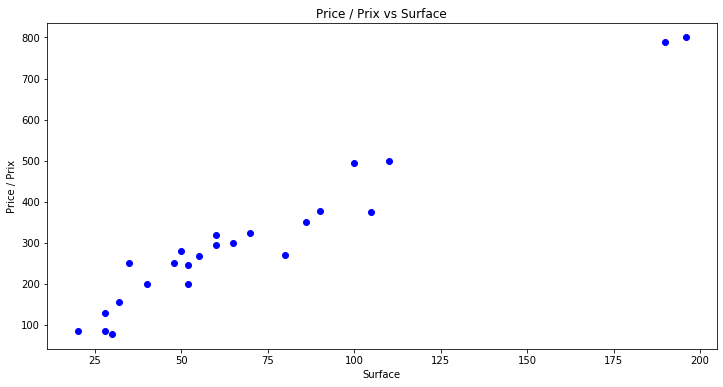

In [4]:
# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(X, Y, 'bo')   # scatter plot showing actual data
plt.title('Price / Prix vs Surface')
plt.xlabel('Surface')
plt.ylabel('Price / Prix')

plt.show()

* La forme du nuage de points autorise un ajustement linéaire. On peut donc postuler le modèle linéaire suivant $$Y = \alpha + \beta X + \epsilon.$$ et on supposera $$\epsilon \sim N(0,\sigma)$$.


* The shape of the cloud allows a linear adjustment. We can therefore postulate the following linear model $$Y = \alpha + \beta X + \epsilon.$$ and assume $$\epsilon \sim N(0,\sigma)$$.

* Des calculs élémentaires conduisent aux cinq premiers résultats suivants, qui contiennent l'information utile :
* Elementary calculations lead to the first five results, which contain useful information :

In [5]:
from scipy.stats import pearsonr, stats

print('Moyenne de la surface / Mean of the surface : %.3f' % df.describe().loc['mean','X'],'m2') 
print('Moyenne du prix / Mean of the price : %.3f' % round(df.describe().loc['mean','Y']),'Fr')
print('Coefficient de corrélation linéaire / Lineare correlation coefficient : %.3f' % pearsonr(X, Y)[0])

Moyenne de la surface / Mean of the surface : 70.083 m2
Moyenne du prix / Mean of the price : 309.000 Fr
Coefficient de corrélation linéaire / Lineare correlation coefficient : 0.973


In [6]:
import numpy as np

slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)

* On en déduit les coefficients de a et b de $\alpha$ et $\beta$:

* We deduce the coefficients of a and b of de $\alpha$ et $\beta$:

In [7]:
print('a = %.3f' % intercept) 
print('b = %.3f' % slope) 

a = 30.092
b = 3.984


* L'équation de la droite d'ajustement est donc:
* The equation of the line of adjustment is therefore:

$$Y = 30.092 + 3.984 X $$ 

Text(0, 0.5, 'Price / Prix')

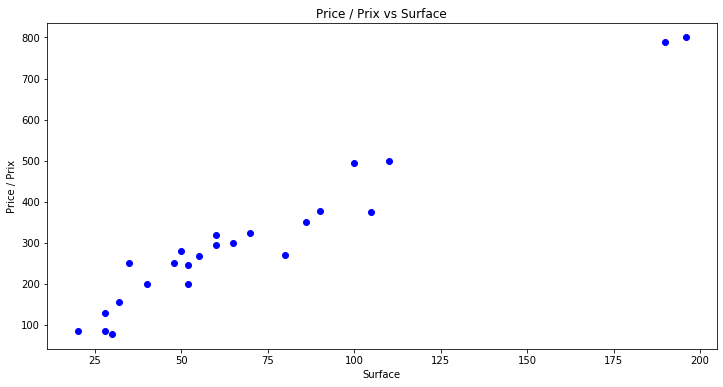

In [8]:
from sklearn.linear_model import LinearRegression

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(X, Y, 'bo')   # scatter plot showing actual data
plt.title('Price / Prix vs Surface')
plt.xlabel('Surface')
plt.ylabel('Price / Prix')



###### Source : Probabilités, analyse des données et Statistique, de Gilbert Saporta.


<p> 
More generally, a linear model is a weighted forecast of input variables, there is a constant term (intercept) / Plus généralement, une modèle linéaire effectue une prédiction en calculant simplement une somme pondérée des variables d'entrée, en y ajoutant un terme constant (intercept). </p> 

$$\textbf{Prédiction d'un modèle linéaire:} \quad / \quad \textbf{Prediction of a linear model:}$$

$$\hat{y} =  \theta _{0} + \theta _{1} x_{1}  +  \theta _{2} x_{2}+ \ldots +\theta _{n} x_{n}$$

* $\hat{y}$ est la valeur prédite / $\hat{y}$ is the predicted value,
* n est le nombre de variables / n is the number of variables,
* $x_{i}$ est la valeur de la $i^{ième}$ variable  / $x_{i}$ is the value of the $i^{th}$ variable,
* $\theta_{j}$ est le $j^{ième}$ paramètre du modèle (terme constant $\theta_{0}$ et coefficients de pondération des variables $\theta_{0}, \theta_{1},\theta_{2},\ldots,\theta_{n}$ )  /   $\theta_{j}$ is the $j^{th}$ parameter of the model ( constant terme $\theta_{0}$ and coefficient of ponderation of the variables $\theta_{0}, \theta_{1},\theta_{2},\ldots,\theta_{n}$ )


Ceci peut être écrit de façon plus concise  sous une forme vectorielle: / This can be written in a more concise vectorial way:


$$\textbf{Prédiction d'un modèle linéaire (forme vectorielle)}: \quad  / \quad \textbf{Prediction of a linear model (vectorial form)}:$$

$$ \hat{y} = h_{\theta}(x)  = {{\theta }^{T}}.x $$


* $\theta$ est le vecteur des paramètres du modèle, il regroupe à la fois le terme constant $\theta_{0}$ et les coefficients de pondération $\theta_{1}$ à $\theta_{n}$ (ou poids) des variables.
* $x$  est le vecteurs des valeurs d'une observation, contenant les valeurs $x_{0}$ à $x_{n}$, où $x_{0}$ est toujours égal à 1.
* $\theta.x$ est le produit scalaire de $\theta$ et de $x$, qui est égal à $\theta _{0} x_{0} + \theta _{1} x_{1}  +  \theta _{2} x_{2}+ \ldots +\theta _{n} x_{n}$, et que l'on notera ${{\theta }^{T}}.x$,
* $h_{\theta}$ est la fonction hypothèse, utilisant les paramètres de modèle $\theta$.


* $\theta$ is the vector of the parameters of the model, it includes both the constant term $\theta_{0}$ and the weights $\theta_{1}$ to $\theta_{n}$ of the variables. 
* $x$  is the vector of observation values containing the values $x_{0}$ to $x_{n}$, where $x_{0}$ is always equal to 1.
* $\theta.x$ is the dot product of $\theta$ and $x$, that equals $\theta _{0} x_{0} + \theta _{1} x_{1}  +  \theta _{2} x_{2}+ \ldots +\theta _{n} x_{n}$, noted ${{\theta }^{T}}x$,
* $h_{\theta}$ is the hypothesis function, using the model parameters $\theta$.


## Objectifs: / Objectives:

* Entrainer un modèle :  définier ses paramètres de sorte que le modèle s'ajuste au mieux au jeu d'entrainement. / Train a model: define its parameters so that the model fits best to the training game. 
* Définir une mesure indiquant si le modèle modèle s'ajuste bien ou mal au jeu d'entrainement : l'erreur quadratique moyenne (RMSE). / To define A measure of whether the model fits well or poorly with the training game: RMSE

$$\textbf{Fonction de coût MSE pour le modèle de regression linéaire. / MSE cost function for the linear regression model.}$$
$$  MSE(X,h_{\theta}) =  \frac{1}{m} \sum_{i=1}^{m}( \theta^{T}x^{(i)}-y^{(i)})^{2}  $$

### Equation normale / Normal equation

<p>Pour trouver la valeur de $\theta$ qui minimise la fontion de coût, il existe une <i>solution analytique</i>:  l'équation normale. /  
To find the value of $ \ theta $ that minimizes the cost function, there is an <i> analytical solution: the normal equation.</i> </p>

$$\textbf{Equation normale / Normal equation}$$
$$  \hat{ \theta }=(X^{T}X)^{-1}X^{T}y$$

* $\hat{ \theta }$ est la valeur de $\theta$ qui miminise la fonction de coût. / $ \hat{\theta} $ is the value of $ \theta $ which minimizes the cost function.
* y est le vecteur des valeurs cibles $y^{(i)}$ à $y^{(m)}$. / y is the target vector  $y^{(i)}$ to $y^{(m)}$ .

### Exemple avec simulation. /  Example with simulation.

Générons maintenant des données à l'allure linéaire sur lesquelles tester cette équation: / Let us now generate linear data on which to test this equation:

In [9]:
import numpy as np
import random

np.random.seed(30)

X = 2*np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)

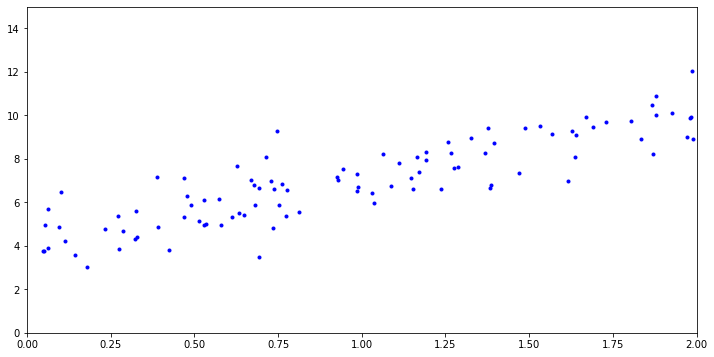

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

Calculons maintenant $\hat{\theta}$ à l'aide de l'équation normale.

In [11]:
X_b = np.c_[np.ones((100,1)), X] # Ajouter x0 = 1 à chaque observation.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.10729646],
       [2.97224919]])

<p> En pratique nous avons utilisé la fonction y = 4 + 3x + bruit gaussien pour générer les données. Nous avons obtenu pour une meilleur estimation de $\theta$: $\hat{\theta}$ = [4.10729646,2.97224919].
<p> In practice we used the function y = 4 + 3x + Gaussian noise to generate the data. We got a best estimation of $\theta$: $\hat{\theta}$ = [4.10729646,2.97224919]. </p>

Nous n'optenons pas exactement $\theta_{0} = 4 $ et  $\theta_{1} = 3 $ mais $\theta_{0} = 4.10729646 $ et  $\theta_{1} = 2.97224919$.
L'ajout d'un bruit gaussien n'a pas permis d'obtenir les paramètres exactes malgré la proximinté des résultats. 

We do not exactly get $\theta_{0} = 4$ and $ \theta_{1} = 3$ but $ \theta_{0} = 4.10729646$ and $ \theta_{1} = 2.97224919$.
The addition of a Gaussian noise did not allow to obtain the exact parameters despite the proximity of the results.

Employons $\hat{\theta}$ pour faire des prédictions / Let us use $ \hat{\theta} $ to make predictions

In [12]:
X_new =  np.array([[0],[2]])

In [13]:
X_new_b = np.c_[np.ones((2,1)), X_new] # Ajouter x0 = 1 à chaque observation. / Add  x0 = 1 to every observation.
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.10729646],
       [10.05179483]])

Réprésentation graphique des prédictions de ce modèle: / Graphical representation of the predictions of this model:

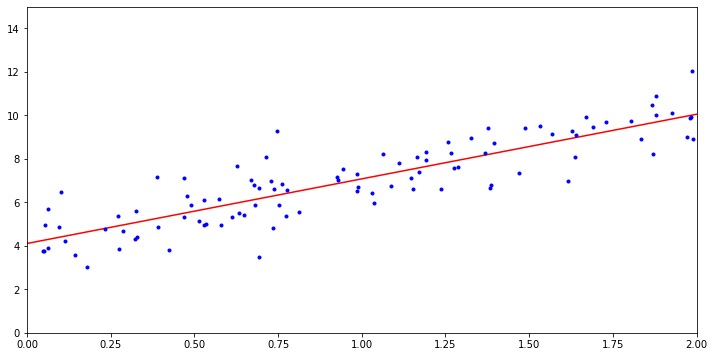

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

Effectuer une regression linéaire avec Scikit-Learn est très simple: / 
Performing a linear regression with Scikit-Learn is very simple:

In [15]:
from sklearn.linear_model import LinearRegression # Import library

lin_reg = LinearRegression() # Create Class 

lin_reg.fit(X, y) # Fit the model

print(lin_reg.intercept_, lin_reg.coef_) # Print coefficient
print('\n')
print(lin_reg.predict(X_new)) # Print prediction

[4.10729646] [[2.97224919]]


[[ 4.10729646]
 [10.05179483]]


### Complexité algorithmique

The Normal Equation computes the inverse of $X^{T}$ · $X$, which is an n × n matrix
(where n is the number of features). The computational complexity of inverting such a
matrix is typically about $O(n^{2.4})$ to $O(n^{3})$ (depending on the implementation). In
other words, if you double the number of features, you multiply the computation
time by roughly $2^{2.4} = 5.3$ to $2^{3}$ = 8.

### Example 2: / Exemple 2: 

##### Load the diabetes dataset

In [16]:
import pandas as pd

CAC40 = pd.read_csv('CAC40.txt',sep ='\t', parse_dates = True)
TAUXEMPLOI = pd.read_csv('TAUXEMPLOI.txt',sep ='\t')
TILIN = pd.read_csv('TILIN.txt',sep ='\t')

#source:  
#https://live.euronext.com/fr/product/indices/FR0003500008-XPAR
#https://data.oecd.org/fr/emp/taux-d-emploi.htm
#https://data.oecd.org/fr/interest/taux-d-interet-a-long-terme.htm

In [17]:
CAC40.head()

,time,CAC40
0,03/12/1987 01:00,1018.78
1,04/12/1987 01:00,989.14
2,07/12/1987 01:00,964.20
3,08/12/1987 01:00,977.19
4,09/12/1987 01:00,969.56


In [18]:
TAUXEMPLOI.head()

,PERIODE,TEMP
0,2019-T2,51.0
1,2019-T1,51.0
2,2018-T4,51.2
3,2018-T3,51.0
4,2018-T2,51.0


In [19]:
TILIN.head()

,TIME,Value
0,2002-12,4.383333
1,2003-01,4.224091
2,2003-02,4.012000
3,2003-03,4.098095
4,2003-04,4.220953


##### Convert to datetime and create quarter 

In [20]:
TAUXEMPLOI.head()

,PERIODE,TEMP
0,2019-T2,51.0
1,2019-T1,51.0
2,2018-T4,51.2
3,2018-T3,51.0
4,2018-T2,51.0


In [21]:
TAUXEMPLOI["annee"] = TAUXEMPLOI.PERIODE.apply(lambda x: int(x[:4]))
TAUXEMPLOI["q"] = TAUXEMPLOI.PERIODE.apply(lambda x: int(x[-1:]))

In [22]:
TAUXEMPLOI['PERIODE'] = pd.PeriodIndex(year=TAUXEMPLOI['annee'], quarter=TAUXEMPLOI['q'])

In [23]:
TAUXEMPLOI.head()
del TAUXEMPLOI['annee']
del TAUXEMPLOI['q']

In [24]:
TAUXEMPLOI.dtypes

PERIODE    period[Q-DEC]
TEMP             float64
dtype: object

In [25]:
TAUXEMPLOI

,PERIODE,TEMP
0,2019Q2,51.0
1,2019Q1,51.0
2,2018Q4,51.2
3,2018Q3,51.0
4,2018Q2,51.0
...,...,...
61,2004Q1,51.5
62,2003Q4,51.6
63,2003Q3,51.7
64,2003Q2,51.8


In [26]:
CAC40.time = CAC40.time.apply(lambda d: pd.to_datetime(d,format='%d/%m/%Y %H:%M', errors='ignore')) # convert character to date

CAC40['Qtr'] = pd.to_datetime(CAC40['time'].values, format='%Y-%m-%d %H:%M:%S').astype('period[Q]') # set to quarter
groupedCAC40 = CAC40.groupby('Qtr')

groupedCAC40 = groupedCAC40.agg(['last', 'mean']) # get last quarter and mean grouped by quarter
groupedCAC40 = groupedCAC40.reset_index()

groupedCAC40.columns = [''] * len(groupedCAC40.columns) # Remove and rename columns

groupedCAC40.columns = ['Qtr','last','mean']
groupedCAC40

,Qtr,last,mean
0,1987Q4,1007.45,1008.189474
1,1988Q1,1016.71,1026.536406
2,1988Q2,1320.17,1178.037419
3,1988Q3,1416.83,1325.015714
4,1988Q4,1577.26,1474.599672
...,...,...,...
124,2018Q4,4730.69,5013.295625
125,2019Q1,5350.53,5080.688254
126,2019Q2,5538.97,5428.572742
127,2019Q3,5677.79,5512.239545


In [27]:
groupedCAC40.dtypes

Qtr     period[Q-DEC]
last          float64
mean          float64
dtype: object

In [28]:
groupedCAC40 = groupedCAC40.sort_values(['Qtr'], ascending=False)
groupedCAC40

,Qtr,last,mean
128,2019Q4,5889.70,5669.781034
127,2019Q3,5677.79,5512.239545
126,2019Q2,5538.97,5428.572742
125,2019Q1,5350.53,5080.688254
124,2018Q4,4730.69,5013.295625
...,...,...,...
4,1988Q4,1577.26,1474.599672
3,1988Q3,1416.83,1325.015714
2,1988Q2,1320.17,1178.037419
1,1988Q1,1016.71,1026.536406


In [29]:
TILIN['Qtr'] = pd.to_datetime(TILIN['TIME'].values, format='%Y-%m').astype('period[Q]')

groupedTILIN = TILIN.groupby('Qtr')

groupedTILIN = groupedTILIN.agg(['last', 'mean'])
groupedTILIN = groupedTILIN.reset_index()

groupedTILIN.columns = [''] * len(groupedTILIN.columns)

groupedTILIN.columns = ['Qtr','last','mean']
groupedTILIN
TILIN.head()

,TIME,Value,Qtr
0,2002-12,4.383333,2002Q4
1,2003-01,4.224091,2003Q1
2,2003-02,4.012000,2003Q1
3,2003-03,4.098095,2003Q1
4,2003-04,4.220953,2003Q2


In [30]:
TILIN.dtypes

TIME            object
Value          float64
Qtr      period[Q-DEC]
dtype: object

In [31]:
groupedTILIN = groupedTILIN.sort_values(['Qtr'], ascending=False )

In [32]:
groupedTILIN

,Qtr,last,mean
67,2019Q3,-0.280000,-0.230000
66,2019Q2,0.080000,0.250000
65,2019Q1,0.440000,0.546667
64,2018Q4,0.700000,0.760000
63,2018Q3,0.770000,0.713333
...,...,...,...
4,2003Q4,4.335714,4.342419
3,2003Q3,4.230000,4.133706
2,2003Q2,3.693333,3.936032
1,2003Q1,4.098095,4.111395


###### Obtenir les sous-ensembles qui couvrent la même période que table du Taux d'emploiement / Get the subset that coverts the periode as the table of taux d'emploiement

In [33]:
groupedCAC40sub = groupedCAC40[groupedCAC40.Qtr.isin(TAUXEMPLOI['PERIODE'])]

In [187]:
groupedCAC40sub

,Qtr,last,mean
126,2019Q2,5538.97,5428.572742
125,2019Q1,5350.53,5080.688254
124,2018Q4,4730.69,5013.295625
123,2018Q3,5493.49,5411.088462
122,2018Q2,5323.53,5433.466667
121,2018Q1,5167.30,5317.364921
120,2017Q4,5312.56,5387.592698
119,2017Q3,5329.81,5167.403692
118,2017Q2,5120.68,5257.568548
117,2017Q1,5122.51,4909.620462


In [34]:
groupedTILINsub = groupedTILIN[groupedTILIN.Qtr.isin(TAUXEMPLOI['PERIODE'])]

In [35]:
groupedTILINsub

,Qtr,last,mean
66,2019Q2,0.080000,0.250000
65,2019Q1,0.440000,0.546667
64,2018Q4,0.700000,0.760000
63,2018Q3,0.770000,0.713333
62,2018Q2,0.750000,0.770000
...,...,...,...
5,2004Q1,3.976087,4.105894
4,2003Q4,4.335714,4.342419
3,2003Q3,4.230000,4.133706
2,2003Q2,3.693333,3.936032


####   Verifier la linéarité / Checking for Linearity

In [36]:
print(groupedCAC40sub.dtypes)
print(' ')
print(groupedTILINsub.dtypes)
print(' ')
print(TAUXEMPLOI.dtypes)

Qtr     period[Q-DEC]
last          float64
mean          float64
dtype: object
 
Qtr     period[Q-DEC]
last          float64
mean          float64
dtype: object
 
PERIODE    period[Q-DEC]
TEMP             float64
dtype: object


##### Working with 'last'

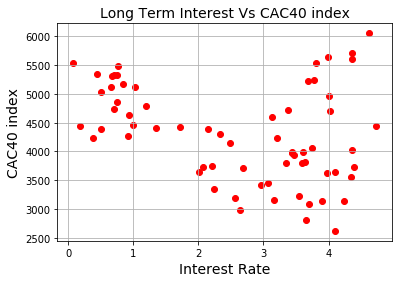

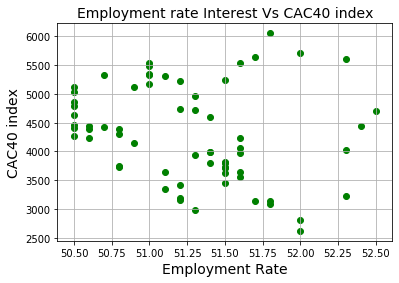

In [37]:
import matplotlib.pyplot as plt

plt.scatter(groupedTILINsub['last'], groupedCAC40sub['last'], color='red')
plt.title('Long Term Interest Vs CAC40 index', fontsize=14)
plt.xlabel('Interest Rate', fontsize=14)
plt.ylabel('CAC40 index', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(TAUXEMPLOI['TEMP'], groupedCAC40sub['last'], color='green')
plt.title('Employment rate Interest Vs CAC40 index', fontsize=14)
plt.xlabel('Employment Rate', fontsize=14)
plt.ylabel('CAC40 index', fontsize=14)
plt.grid(True)


##### Working with 'mean'

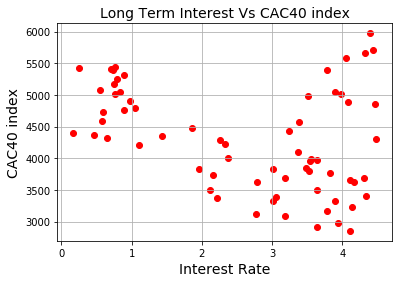

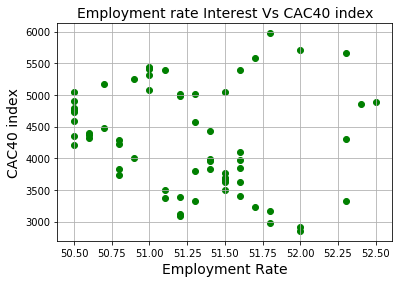

In [197]:
plt.scatter(groupedTILINsub['mean'], groupedCAC40sub['mean'], color='red')
plt.title('Long Term Interest Vs CAC40 index', fontsize=14)
plt.xlabel('Interest Rate', fontsize=14)
plt.ylabel('CAC40 index', fontsize=14)
plt.grid(True)
plt.show()
 
plt.scatter(TAUXEMPLOI['TEMP'], groupedCAC40sub['mean'], color='green')
plt.title('Employment rate Interest Vs CAC40 index', fontsize=14)
plt.xlabel('Employment Rate', fontsize=14)
plt.ylabel('CAC40 index', fontsize=14)
plt.grid(True)

In [203]:
groupedTILINsub

,Qtr,last,mean
66,2019Q2,0.080000,0.250000
65,2019Q1,0.440000,0.546667
64,2018Q4,0.700000,0.760000
63,2018Q3,0.770000,0.713333
62,2018Q2,0.750000,0.770000
61,2018Q1,0.840000,0.893333
60,2017Q4,0.670000,0.733333
59,2017Q3,0.700000,0.750155
58,2017Q2,0.664091,0.786743
57,2017Q1,1.021609,0.971800


In [210]:
groupedTILINsub['mean']

66    0.250000
65    0.546667
64    0.760000
63    0.713333
62    0.770000
61    0.893333
60    0.733333
59    0.750155
58    0.786743
57    0.971800
56    0.582660
55    0.169499
54    0.471207
53    0.648156
52    0.893190
51    1.041099
50    0.839791
49    0.593410
48    1.105452
47    1.438733
46    1.858657
45    2.262914
44    2.330033
43    2.364978
42    1.962097
41    2.160253
40    2.111908
39    2.210610
38    2.771583
37    3.049875
        ...   
30    3.183500
29    3.483714
28    3.529372
27    3.635720
26    3.787753
25    3.642386
24    3.899922
23    4.484654
22    4.469827
21    4.082848
20    4.328016
19    4.442817
18    4.387915
17    4.054051
16    3.786043
15    3.897366
14    3.987011
13    3.512511
12    3.388560
11    3.233508
10    3.373739
9     3.641921
8     3.825274
7     4.158909
6     4.306586
5     4.105894
4     4.342419
3     4.133706
2     3.936032
1     4.111395
Name: mean, Length: 66, dtype: float64

In [213]:
TAUXEMPLOI

,PERIODE,TEMP
0,2019Q2,51.0
1,2019Q1,51.0
2,2018Q4,51.2
3,2018Q3,51.0
4,2018Q2,51.0
5,2018Q1,51.0
6,2017Q4,51.1
7,2017Q3,50.7
8,2017Q2,50.9
9,2017Q1,50.5


#### REGRESSION

In [38]:
X = groupedTILINsub.merge(TAUXEMPLOI, left_on='Qtr', right_on='PERIODE')

In [39]:
X = X[['mean','TEMP']]
Y = groupedCAC40sub['mean'] 

In [43]:
# with sklearn
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


Intercept: 
 -26218.639320778475
Coefficients: 
 [-391.01312056  615.31414492]


In [42]:
Y

126    5428.572742
125    5080.688254
124    5013.295625
123    5411.088462
122    5433.466667
          ...     
65     3657.495313
64     3399.462344
63     3231.403788
62     2980.071452
61     2851.599524
Name: mean, Length: 66, dtype: float64

In [237]:
# with statsmodels
Y = list(Y)
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     6.099
Date:                Sun, 10 Nov 2019   Prob (F-statistic):            0.00379
Time:                        20:18:31   Log-Likelihood:                -529.61
No. Observations:                  66   AIC:                             1065.
Df Residuals:                      63   BIC:                             1072.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.622e+04   1.67e+04     -1.572      0.1

C:\Users\Ndoye\Anaconda3_\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Example 3: / Exemple 3: DIABETE 

In [208]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

##### Load the diabetes dataset

In [2]:
diabetes = datasets.load_diabetes()

##### Get keys of the dictionary

In [14]:
diabetes.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [13]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [71]:
#diabetes.data
diabetes.data[:,0:12]


array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [18]:
diabetes.data.ndim

2

In [19]:
diabetes.data.shape

(442, 10)

In [17]:
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [16]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

###### Use only one feature

In [67]:
diabetes.data[:, np.newaxis, 2].shape

(442, 1)

In [65]:
diabetes.data.shape

(442, 10)

In [33]:
diabetes_X = diabetes.data[:, np.newaxis, 2]

###### Split the data into training/testing sets

In [48]:
# To understand how works this slicing
#np.arange(100)[:-20]
#np.arange(100)[-20:]
#np.arange(100)[20:]
#np.arange(100)[:20]

n = 40

diabetes_X_train = diabetes_X[:n]
diabetes_X_test = diabetes_X[n:]
diabetes_y_train = diabetes.target[:n]
diabetes_y_test = diabetes.target[n:]

###### Create linear regression object

In [49]:
regr = linear_model.LinearRegression()

###### Train the model using the training sets

In [50]:
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

###### Make predictions using the testing set

In [51]:
diabetes_y_pred = regr.predict(diabetes_X_test)

###### The coefficients

In [52]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [858.10742226]


###### The mean squared error

In [53]:
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))

Mean squared error: 3903.46


######  Explained variance score: 1 is perfect prediction

In [72]:
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

Variance score: 0.35


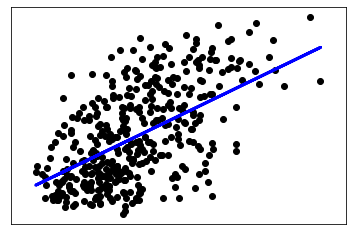

In [73]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

###### Read the data from source and had some exploratory analysis.

In [ ]:
import pandas as pd

In [114]:
diabeteImp = pd.read_csv(r"C:\Users\Ndoye\Documents\AIMS-Senegal\diabete.txt", sep='\t')

In [115]:
diabeteImp

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
5,23,1,22.6,89.00,139,64.8,61.0,2.00,4.1897,68,97
6,36,2,22.0,90.00,160,99.6,50.0,3.00,3.9512,82,138
7,66,2,26.2,114.00,255,185.0,56.0,4.55,4.2485,92,63
8,60,2,32.1,83.00,179,119.4,42.0,4.00,4.4773,94,110
9,29,1,30.0,85.00,180,93.4,43.0,4.00,5.3845,88,310


In [136]:
diabeteImp.drop(['SEX'], axis=1)

,AGE,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
5,23,22.6,89.00,139,64.8,61.0,2.00,4.1897,68,97
6,36,22.0,90.00,160,99.6,50.0,3.00,3.9512,82,138
7,66,26.2,114.00,255,185.0,56.0,4.55,4.2485,92,63
8,60,32.1,83.00,179,119.4,42.0,4.00,4.4773,94,110
9,29,30.0,85.00,180,93.4,43.0,4.00,5.3845,88,310


In [116]:
diabeteImpFeatures = diabeteImp[['AGE','SEX','BMI','BP','S1','S2','S3','S4','S5','S6']] 

In [117]:
diabeteImpTarget = diabeteImp[['Y']]

In [118]:
diabeteImpTarget.describe()

,Y
count,442.000000
mean,152.133484
std,77.093005
min,25.000000
25%,87.000000
50%,140.500000
75%,211.500000
max,346.000000


In [153]:
diabeteImpTarget.values

array([[151],
       [ 75],
       [141],
       [206],
       [135],
       [ 97],
       [138],
       [ 63],
       [110],
       [310],
       [101],
       [ 69],
       [179],
       [185],
       [118],
       [171],
       [166],
       [144],
       [ 97],
       [168],
       [ 68],
       [ 49],
       [ 68],
       [245],
       [184],
       [202],
       [137],
       [ 85],
       [131],
       [283],
       [129],
       [ 59],
       [341],
       [ 87],
       [ 65],
       [102],
       [265],
       [276],
       [252],
       [ 90],
       [100],
       [ 55],
       [ 61],
       [ 92],
       [259],
       [ 53],
       [190],
       [142],
       [ 75],
       [142],
       [155],
       [225],
       [ 59],
       [104],
       [182],
       [128],
       [ 52],
       [ 37],
       [170],
       [170],
       [ 61],
       [144],
       [ 52],
       [128],
       [ 71],
       [163],
       [150],
       [ 97],
       [160],
       [178],
       [ 48],
      

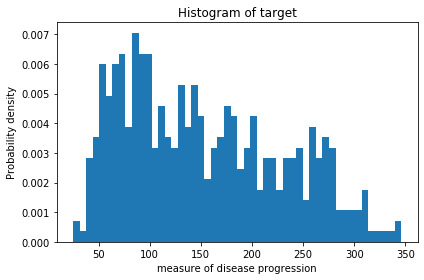

In [154]:
import matplotlib
import matplotlib.pyplot as plt

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(diabeteImpTarget.values, num_bins, density=1)

ax.set_xlabel('measure of disease progression')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of target')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

In [155]:
diabeteImpFeatures.drop(['SEX'], axis=1).describe()

,AGE,BMI,BP,S1,S2,S3,S4,S5,S6
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181
std,13.109028,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335
min,19.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000
25%,38.250000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000
50%,50.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000
75%,59.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000
max,79.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000


In [110]:
diabeteImpFeatures['SEX'].value_counts()

1    235
2    207
Name: SEX, dtype: int64

In [140]:
corr = diabeteImp.drop(['SEX'], axis=1).corr()
corr

,AGE,BMI,BP,S1,S2,S3,S4,S5,S6,Y
AGE,1.000000,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
BMI,0.185085,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
BP,0.335428,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
S1,0.260061,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
S2,0.219243,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
S3,-0.075181,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
S4,0.203841,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
S5,0.270774,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
S6,0.301731,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483
Y,0.187889,0.586450,0.441482,0.212022,0.174054,-0.394789,0.430453,0.565883,0.382483,1.000000


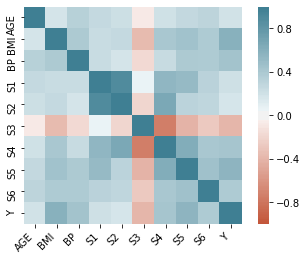

In [139]:
import seaborn as sns

corr = diabeteImp.drop(['SEX'], axis=1).corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

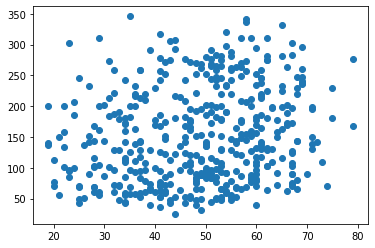

In [143]:
# plot
from matplotlib import pyplot
pyplot.scatter(diabeteImpFeatures['AGE'].values,diabeteImpTarget.values)
pyplot.show()

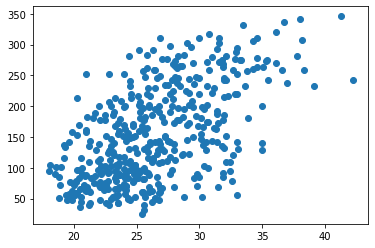

In [144]:
# plot
from matplotlib import pyplot
pyplot.scatter(diabeteImpFeatures['BMI'].values,diabeteImpTarget.values)
pyplot.show()

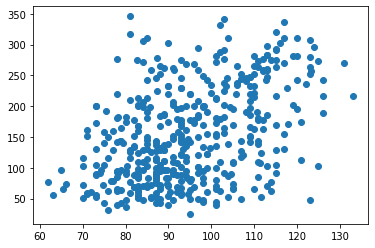

In [145]:
# plot
from matplotlib import pyplot
pyplot.scatter(diabeteImpFeatures['BP'].values,diabeteImpTarget.values)
pyplot.show()

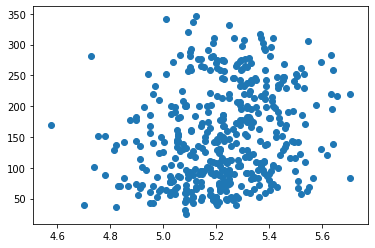

In [147]:
# plot
from matplotlib import pyplot
pyplot.scatter(diabeteImpFeatures['S1'].values,diabeteImpTarget.values)
pyplot.show()

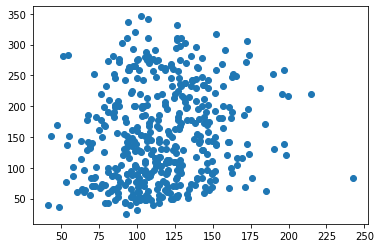

In [148]:
# plot
from matplotlib import pyplot
pyplot.scatter(diabeteImpFeatures['S2'].values,diabeteImpTarget.values)
pyplot.show()

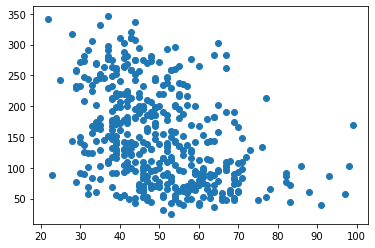

In [149]:
# plot
from matplotlib import pyplot
pyplot.scatter(diabeteImpFeatures['S3'].values,diabeteImpTarget.values)
pyplot.show()

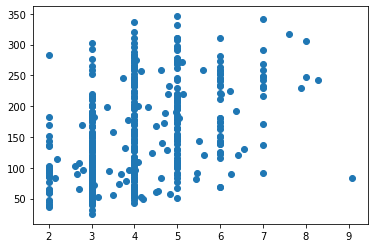

In [150]:
# plot
from matplotlib import pyplot
pyplot.scatter(diabeteImpFeatures['S4'].values,diabeteImpTarget.values)
pyplot.show()

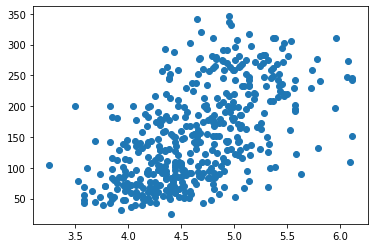

In [151]:
from matplotlib import pyplot
pyplot.scatter(diabeteImpFeatures['S5'].values,diabeteImpTarget.values)
pyplot.show()

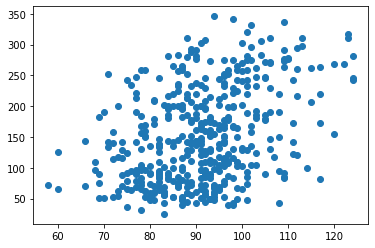

In [152]:
from matplotlib import pyplot
pyplot.scatter(diabeteImpFeatures['S6'].values,diabeteImpTarget.values)
pyplot.show()

### Example 4: / Exemple 4: 

In [96]:
mark = ['ALFASUD-TI-1350','AUDI-100-L','SIMCA-1307-GLS','CITROEN-CG-CLUB','FIAT-132-1600GLS','LANCIA-BETA-1300',
        'PEUGEOT-504','RENAULT-16-TL','RENAULT-30-TS','TOYOTA-COROLLA','ALFETTA-1.66','PRINCESS-1800-HL','DATSUN-200L',
        'TAUNUS-2000-GL','RANCHO','MAZDA-9295','OPEL-REKORD-L','LADA-1300'	]

cyl =  [1350,1588,1294,1222,1585,1297,1796,
        1565,2664,1166,1570,1798,1998,1993,
        1442,1769,1979,1294]

PUIS =  [79,85,68,59,98,82,79,55,
         128,55,109,82,115,98,
         80,83,100,68]

LON =  [393,468,424,412,439,429,449,
        424,452,399,428,445,469,438,
        431,440,459,404]

LAR = [161	,177	,168	,161	,164	,
       169	,169	,163	,173	,157	,
       162	,172	,169	,170	,166	,
       165	,173	,161	]

POIDS = [870	,1110	,1050	,930	,
        1105	,1080	,1160	,1010	,
        1320	,815	,1060	,1160	,
        1370	,1080	,1129	,1095	,
        1120	,955]

VITESSE = [165	,160	,152	,151	,165	,
           160	,154	,140	,180	,140	,
           175	,158	,160	,167	,144	,
           165	,173	,140	]

FINITION = ['B'	,'TB'	,'M'	,'M'	,
            'B'	,'TB'	,'B'	,'B'	,
            'TB'	,'M'	,'TB'	,'B'	,
            'TB'	,'B'	,'TB'	,'M'	,
            'B'	,'M'	]

PRIX = [30570	,39990	,29600	,28250	,
        34900	,35480	,32300	,32000	,
        47700	,26540	,42395	,33990	,
        43980	,35010	,39450	,27900	,
        32700	,22100]

In [100]:
dic = {'MARQUE': mark, 
      'CYLINDRE' : cyl, 
      'PUISSANCE' :PUIS , 
      'LONGUEUR' : LON , 
      'LARGEUR' :LAR , 
      'POIDS' : POIDS, 
      'VITESSE' : VITESSE, 
      'FINITION' : FINITION, 
      'PRIX' :PRIX  
      }


In [101]:
auto = pd.DataFrame(dic)

In [102]:
auto.drop(['FINITION'], axis=1)

,MARQUE,CYLINDRE,PUISSANCE,LONGUEUR,LARGEUR,POIDS,VITESSE,PRIX
0,ALFASUD-TI-1350,1350,79,393,161,870,165,30570
1,AUDI-100-L,1588,85,468,177,1110,160,39990
2,SIMCA-1307-GLS,1294,68,424,168,1050,152,29600
3,CITROEN-CG-CLUB,1222,59,412,161,930,151,28250
4,FIAT-132-1600GLS,1585,98,439,164,1105,165,34900
5,LANCIA-BETA-1300,1297,82,429,169,1080,160,35480
6,PEUGEOT-504,1796,79,449,169,1160,154,32300
7,RENAULT-16-TL,1565,55,424,163,1010,140,32000
8,RENAULT-30-TS,2664,128,452,173,1320,180,47700
9,TOYOTA-COROLLA,1166,55,399,157,815,140,26540


In [103]:
autoFeatures = auto[['MARQUE','CYLINDRE','PUISSANCE','LONGUEUR','LARGEUR','POIDS','VITESSE']]
autoTarget = auto[['PRIX']]

In [104]:
autoTarget.describe()

,PRIX
count,18.000000
mean,34158.611111
std,6571.577795
min,22100.000000
25%,29842.500000
50%,33345.000000
75%,38457.500000
max,47700.000000


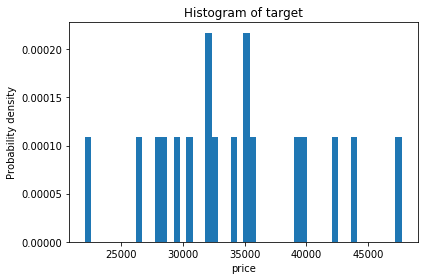

In [105]:
import matplotlib
import matplotlib.pyplot as plt

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(autoTarget.values, num_bins, density=1)

ax.set_xlabel('price')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of target')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

In [106]:
autoFeatures.describe()

,CYLINDRE,PUISSANCE,LONGUEUR,LARGEUR,POIDS,VITESSE
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,1631.666667,84.611111,433.500000,166.666667,1078.833333,158.277778
std,373.929846,20.376281,22.107358,5.313689,136.957808,12.140383
min,1166.000000,55.000000,393.000000,157.000000,815.000000,140.000000
25%,1310.250000,70.750000,424.000000,162.250000,1020.000000,151.250000
50%,1577.500000,82.000000,434.500000,167.000000,1087.500000,160.000000
75%,1797.500000,98.000000,448.000000,169.750000,1126.750000,165.000000
max,2664.000000,128.000000,469.000000,177.000000,1370.000000,180.000000


In [107]:
corr = auto.drop(['MARQUE'], axis=1).corr()
corr

,CYLINDRE,PUISSANCE,LONGUEUR,LARGEUR,POIDS,VITESSE,PRIX
CYLINDRE,1.000000,0.796628,0.701462,0.629757,0.788952,0.664934,0.638581
PUISSANCE,0.796628,1.000000,0.641362,0.520832,0.765293,0.844379,0.798700
LONGUEUR,0.701462,0.641362,1.000000,0.849266,0.868090,0.475928,0.643757
LARGEUR,0.629757,0.520832,0.849266,1.000000,0.716874,0.472945,0.546649
POIDS,0.788952,0.765293,0.868090,0.716874,1.000000,0.477596,0.753295
VITESSE,0.664934,0.844379,0.475928,0.472945,0.477596,1.000000,0.581760
PRIX,0.638581,0.798700,0.643757,0.546649,0.753295,0.581760,1.000000


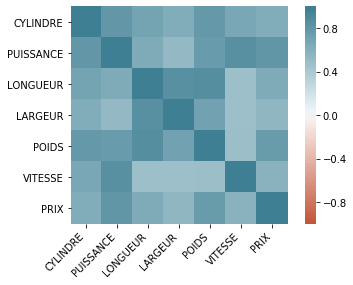

In [108]:
import seaborn as sns

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

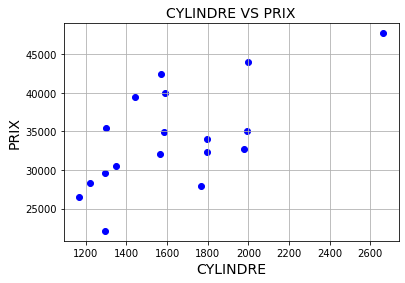

In [109]:
# plot
plt.scatter(autoFeatures['CYLINDRE'].values,autoTarget.values, color='blue')
plt.title('CYLINDRE VS PRIX', fontsize=14)
plt.xlabel('CYLINDRE', fontsize=14)
plt.ylabel('PRIX', fontsize=14)
plt.grid(True)
plt.show()

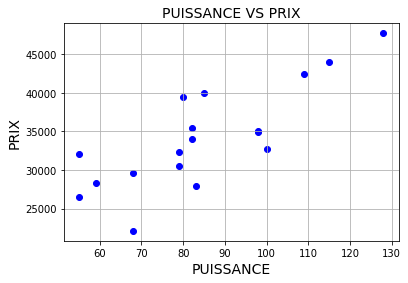

In [110]:
# plot
plt.scatter(autoFeatures['PUISSANCE'].values,autoTarget.values, color='blue')
plt.title('PUISSANCE VS PRIX', fontsize=14)
plt.xlabel('PUISSANCE', fontsize=14)
plt.ylabel('PRIX', fontsize=14)
plt.grid(True)
plt.show()

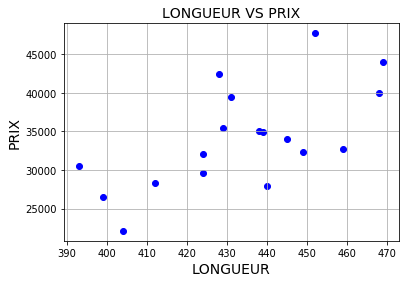

In [111]:
# plot
plt.scatter(autoFeatures['LONGUEUR'].values,autoTarget.values, color='blue')
plt.title('LONGUEUR VS PRIX', fontsize=14)
plt.xlabel('LONGUEUR', fontsize=14)
plt.ylabel('PRIX', fontsize=14)
plt.grid(True)
plt.show()

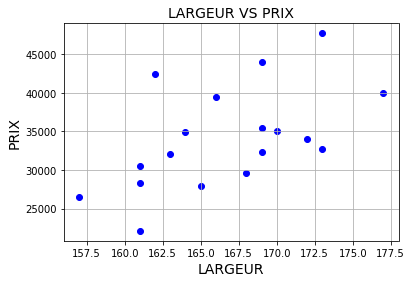

In [112]:
# plot
plt.scatter(autoFeatures['LARGEUR'].values,autoTarget.values, color='blue')
plt.title('LARGEUR VS PRIX', fontsize=14)
plt.xlabel('LARGEUR', fontsize=14)
plt.ylabel('PRIX', fontsize=14)
plt.grid(True)
plt.show()

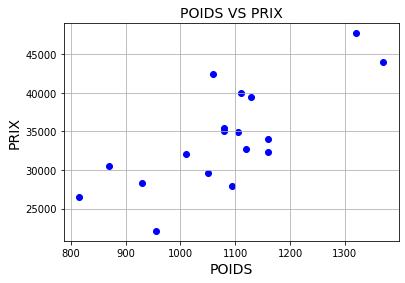

In [113]:
# plot
plt.scatter(autoFeatures['POIDS'].values,autoTarget.values, color='blue')
plt.title('POIDS VS PRIX', fontsize=14)
plt.xlabel('POIDS', fontsize=14)
plt.ylabel('PRIX', fontsize=14)
plt.grid(True)
plt.show()

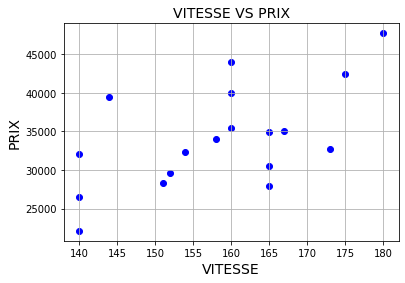

In [114]:
# plot
plt.scatter(autoFeatures['VITESSE'].values,autoTarget.values, color='blue')
plt.title('VITESSE VS PRIX', fontsize=14)
plt.xlabel('VITESSE', fontsize=14)
plt.ylabel('PRIX', fontsize=14)
plt.grid(True)
plt.show()

In [115]:
from sklearn.linear_model import LinearRegression # Import library

regr = LinearRegression() # Create Class 

# Fit the model
regr.fit(autoFeatures.drop(['MARQUE'], axis = 1), autoTarget)

print(np.round(regr.intercept_,3), np.round(regr.coef_,3)) # Print coefficient
print('\n')

[-8239.363] [[  -3.505  282.169  -15.038  208.694   12.575 -111.114]]




Les coefficients estimés sont: / The estimated coefficients are : 

$\theta_{0} = -8239.363 $, $\theta_{1} = -3.505$,$\theta_{2} = 282.169$,$\theta_{3} = -15.038$,$\theta_{4} = 208.694$,$\theta_{5} = 12.575$,$\theta_{6} = -111.114$,

L'equation de la regression est': / The equation of the regression is : 

$$\scriptsize{ PRIX = -8239.363-3.505*CYLINDRE + 282.169*PUISSANCE-15.038*LONGUEUR + 208.694*LARGEUR + 12.575*POIDS-111.114*VITESSE }$$ 

Faire des prédictions en utilisant les features / Make predictions using the features


In [116]:
prix_pred = regr.predict(autoFeatures.drop(['MARQUE'], axis = 1))

In [117]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(autoTarget, prix_pred))

Variance score: 0.71
